# Data Preprocessing For Loan Approval Prediction System
The **Loan Approval Prediction System** is a machine learning-based solution designed to automate and enhance the loan application evaluation process. By analyzing historical loan data, the system predicts whether a loan application is likely to be approved based on various applicant attributes. This predictive model not only improves decision-making accuracy but also reduces manual workload, enabling financial institutions to streamline operations and provide faster responses to applicants.

# Import Libraries

In [1]:
# import libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
# reading file path
file = Path(r"../data/loan.csv")

# reading csv file
df = pd.read_csv(file)

In [3]:
# testing dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Sanity Check

In [4]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# dataset description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# check column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# drop redundant columns
df.drop(columns='Loan_ID', axis=1, inplace=True)

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Check for Duplicates

In [8]:
# check duplicates values
df.duplicated().sum()

np.int64(0)

## Check for null values

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Drop rows with minimal null values
df.dropna(subset=["Married"], inplace=True)

In [11]:
df.isnull().sum()

Gender               13
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Standardize Column Names

In [12]:
# Standardize Column Names
df.columns = df.columns.str.replace('_', '')

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm',
       'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

## Standardize Values

### Checking unique values

In [13]:
df['LoanStatus'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
# Replacing '3+' with '3' in the 'Dependents' column
df['Dependents'] = df['Dependents'].str.replace('3+', '3').astype('Int64')

df['Dependents'].unique()

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

# Exploratory Data Analysis (EDA)

In [17]:
# figure size
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

## Univariate Analysis

### countplot for unique value distribution

In [18]:
len(df.select_dtypes(include='object').columns)

6

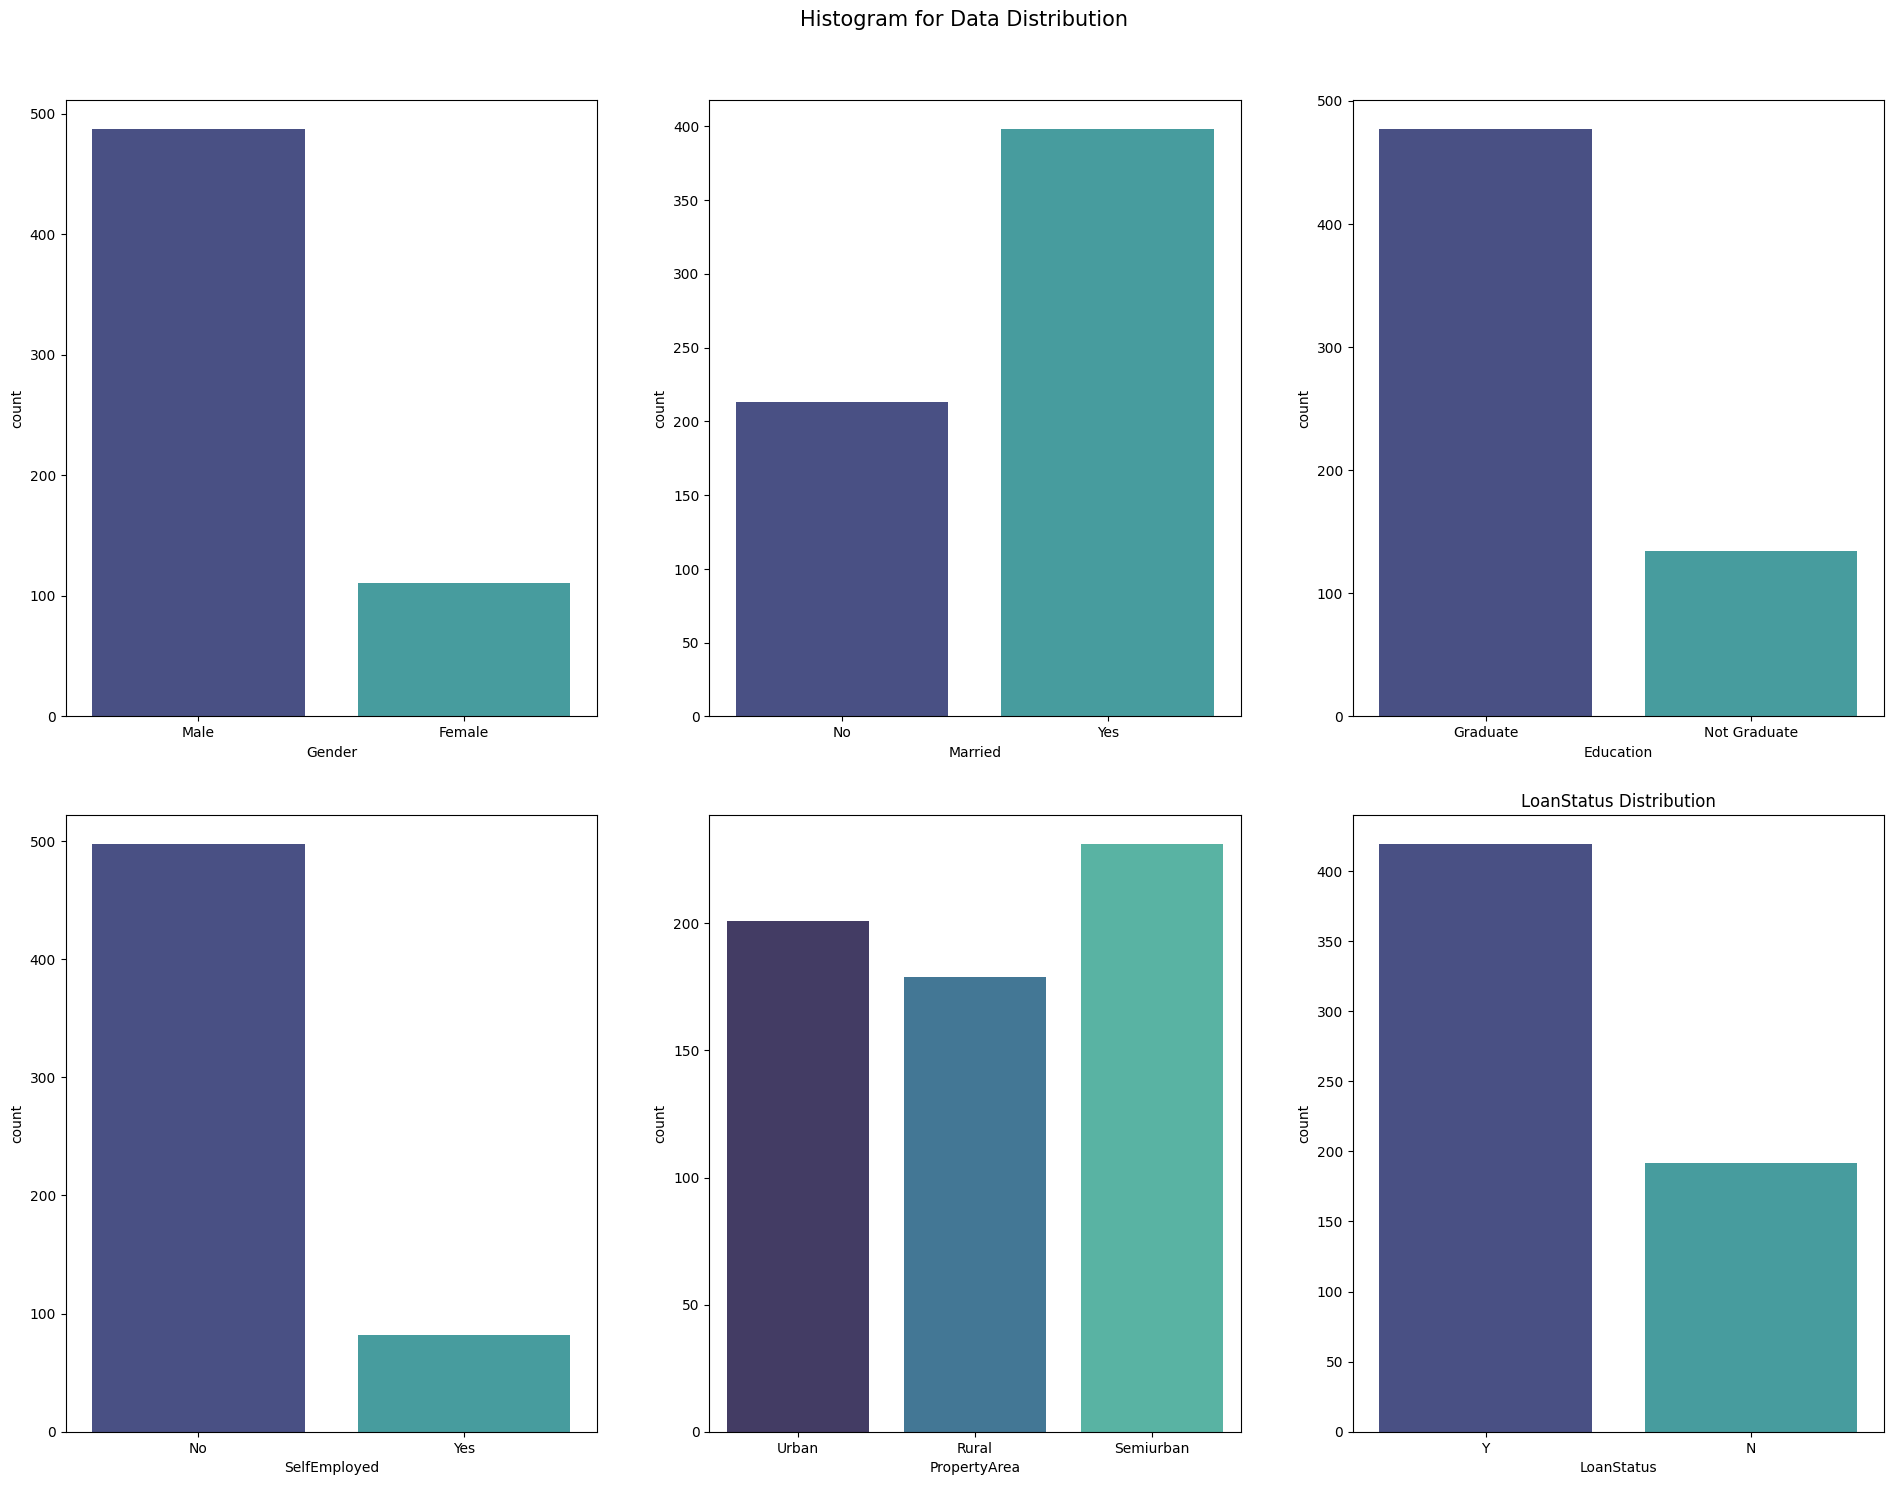

In [19]:
# set the number of rows and columns for the grid
rows, cols = 2, 3

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(df.select_dtypes(include="object").columns):
    row_pos = i // cols
    col_pos = i % cols
    sns.countplot(data=df, x=col, ax=axes[row_pos, col_pos], palette="mako")
    plt.title(f"{col} Distribution")

plt.show()

### **Analysis of Countplots**

The provided countplots offer insights into the distribution of categorical variables in the dataset. Below is a detailed analysis of each countplot:

#### **1. Gender**
**Key Observation:**
- Male applicants significantly outnumber Female applicants
- Approximately 82% of applicants are Male, while only 18% are Female

**Key Takeaways:**
- Severe gender imbalance in the dataset
- Female applicants are underrepresented in loan applications
- Missing Gender data needs to be addressed

**Decision / Action:**
- Handle missing Gender values using **`mode imputation`** or predictive imputation
- Consider using techniques like SMOTE or class weighting to address gender imbalance during modeling
- Validate if gender bias exists in loan approval decisions

#### **2. Married**
**Key Observation:**
- Majority of applicants are Married (approximately 65%)
- About 35% of applicants are Not Married

**Key Takeaways:**
- Married individuals are more likely to apply for loans
- Marriage status could be an important factor in loan approval
- Relatively balanced distribution compared to other categorical variables

**Decision / Action:**
- Handle missing values using **`mode imputation`**
- Include Married status as a feature in the model
- Analyze approval rates by marital status to understand its impact

#### **3. Education**
**Key Observation:**
- Overwhelming majority are Graduates (approximately 80%)
- Only about 20% are Not Graduate

**Key Takeaways:**
- Strong educational bias toward graduates in loan applications
- Graduates may have better income prospects and loan eligibility
- Educational qualification is likely to be a significant factor in loan approval

**Decision / Action:**
- Handle missing values using **`mode imputation`**
- Keep as binary categorical variable (Graduate vs Not Graduate)
- Analyze approval rates by education level to understand its impact

#### **4. SelfEmployed**
**Key Observation:**
- Vast majority are Not SelfEmployed (approximately 87%)
- Only about 13% are SelfEmployed

**Key Takeaways:**
- Salaried individuals dominate loan applications
- SelfEmployed applicants are underrepresented
- Missing values in this feature are substantial and need careful handling

**Decision / Action:**
- Handle missing values using **`mode imputation`**
- Consider creating a separate category for missing values if they represent a meaningful group
- Analyze if self-employment affects loan approval rates due to income stability concerns

#### **5. CreditHistory**
**Key Observation:**
- Most applicants have good credit history (CreditHistory = 1.0)
- Approximately 75% have CreditHistory = 1.0, while 25% have 0.0

**Key Takeaways:**
- Majority of applicants have good credit standing
- Credit history is likely to be one of the most important factors in loan approval
- The distribution suggests credit history is a strong predictor

**Decision / Action:**
- Handle missing values using **`mode imputation`**
- Keep as binary feature (1.0 = Good credit, 0.0 = Bad credit)
- This will likely be a very important feature in the predictive model

#### **6. PropertyArea**
**Key Observation:**
- Semiurban areas have the highest representation
- Urban and Rural areas have relatively balanced representation
- Distribution is fairly even across all three property types

**Key Takeaways:**
- Applicants from all property areas are well-represented
- Semiurban applicants are slightly more common
- Property area may reflect economic factors affecting loan approval

**Decision / Action:**
- No missing values to handle
- Use one-hot encoding for this categorical variable
- Analyze approval rates by property area to understand regional differences